In [ ]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/COVID-19-pooling') 

In [ ]:
! pip install mip

In [ ]:
import os
if not os.path.exists('./results'): 
    os.mkdir('./results')

In [ ]:
from util import simulate_x
from test import test_RS, test_M
import numpy as np
import matplotlib.pyplot as plt
import json 

In [ ]:
num_trials = 100

# Get Started
We will investigate different membership matrices design in this notebook. 

On Nov. 13, positive rates in NY was shifted to 2.3%, corresponding to on average 384 * 2.3% = 8.8 positives among 384 individuals. 

First, let's generate simualted infection vectors with various infection rates. 


In [ ]:
n = 384
ks = list(range(1, 10)) 

In [ ]:
for k in ks: 
    simulate_x(n, k/n, num_trials) 

On average, 0.92 positives in each trail.
On average, 2.29 positives in each trail.
On average, 3.00 positives in each trail.
On average, 3.89 positives in each trail.
On average, 5.35 positives in each trail.
On average, 5.64 positives in each trail.
On average, 6.62 positives in each trail.
On average, 7.76 positives in each trail.
On average, 8.70 positives in each trail.


# Benchmark: Reed Solomon Design
Let's now test the performance of a Reed-Solomon matrix design, as proposed in  [Efficient high-throughput SARS-CoV-2 testing to detect asymptomatic carriers](https://advances.sciencemag.org/content/6/37/eabc5961). 

Before running the cell below, first download the membership matrix from [this link](https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat) and put the file inside the './data/' folder. 

The design tests 384 individuals in 48 pools, such that each individual goes into 6 pools and each pool contains 48 individuals; the matrix is built using a Reed-Solomon error correcting code. 

In [ ]:
# reed solomon performance 
results_RS = []
for k in ks: 
    print("Starting k=%s ..." % k)
    info = test_RS(k/384, fpr=0, fnr=0, num_trials=num_trials)
    results_RS.append(info["accuracy"]) 

# save results 
with open("./results/results_RS.txt", 'w') as outfile:
    json.dump(results_RS, outfile)

Starting k=1 ...
Finished trial 100
Starting k=2 ...
Finished trial 100
Starting k=3 ...
Finished trial 100
Starting k=4 ...
Finished trial 100
Starting k=5 ...
Finished trial 100
Starting k=6 ...
Finished trial 100
Starting k=7 ...
Finished trial 100
Starting k=8 ...
Finished trial 100
Starting k=9 ...
Finished trial 100


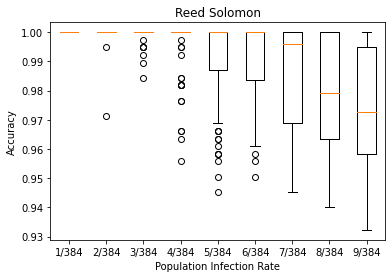

In [ ]:
# plot 
plt.boxplot(results_RS, labels=["%s/384"%k for k in ks])
plt.xlabel("Population Infection Rate")
plt.ylabel("Accuracy") 
plt.title("Reed Solomon")

plt.savefig("./results/results_RS.png")
plt.show() 

# Constant Row Weights + Constant Column Weights 
The Reed Solomon membership matrix used in the benchmark has constant column weights 6 (i.e. each sample is in 6 pools) and constant row weights 48 (i.e. each pool contains 48 samples). How is the performance of an arbitrary membership matrix with this property? 

In [ ]:
from membership_matrix import generate_doubly_regular_col 

In [ ]:
T = 48
column_weight = 6

# random doubly regular performance 
M = generate_doubly_regular_col((T, n), column_weight) 
results_random = []
for k in ks:
    print("Starting k=%s ..." % k)
    info = test_M(M, k/384, n, fpr=0, fnr=0, num_trials=num_trials) 
    results_random.append(info["accuracy"])

# save results 
with open("./results/results_random.txt", 'w') as outfile:
    json.dump(results_random, outfile) 

Starting k=1 ...
Finished trial 100
Starting k=2 ...
Finished trial 100
Starting k=3 ...
Finished trial 100
Starting k=4 ...
Finished trial 100
Starting k=5 ...
Finished trial 100
Starting k=6 ...
Finished trial 100
Starting k=7 ...
Finished trial 100
Starting k=8 ...
Finished trial 100
Starting k=9 ...
Finished trial 100


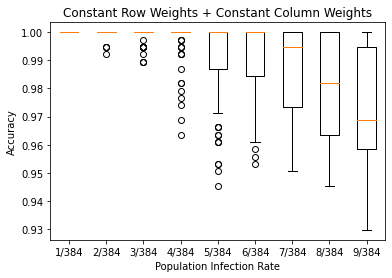

In [ ]:
# plot
plt.boxplot(results_random, labels=["%s/384"%k for k in ks])
plt.xlabel("Population Infection Rate")
plt.ylabel("Accuracy") 
plt.title("Constant Row Weights + Constant Column Weights")

plt.savefig("./results/results_random.png")
plt.show()    

# Comparison between Reed Solomon and Random Design
Alternatively, we might only care about only making row weights constant (each pool consists of the same number of samples), or only making column weights constant (each sample is divided into the same number of times). 

In [ ]:
from membership_matrix import generate_const_row_weight, generate_const_col_weight

In [ ]:
T = 48
column_weight = 6
row_weight = 48

In [ ]:
# random const row weight performance 
M = generate_const_row_weight((T, n), row_weight) 
results_const_row = []
for k in ks:
    print("Starting k=%s ..." % k)
    info = test_M(M, k/384, n, fpr=0, fnr=0, num_trials=num_trials) 
    results_const_row.append(info["accuracy"])

# save results 
with open("./results/results_const_row.txt", 'w') as outfile:
    json.dump(results_const_row, outfile) 

Starting k=1 ...
Finished trial 100
Starting k=2 ...
Finished trial 100
Starting k=3 ...
Finished trial 100
Starting k=4 ...
Finished trial 100
Starting k=5 ...
Finished trial 100
Starting k=6 ...
Finished trial 100
Starting k=7 ...
Finished trial 100
Starting k=8 ...
Finished trial 100
Starting k=9 ...
Finished trial 100


In [ ]:
# random const col weight performance 
M = generate_const_col_weight((T, n), column_weight) 
results_const_col = []
for k in ks:
    print("Starting k=%s ..." % k)
    info = test_M(M, k/384, n, fpr=0, fnr=0, num_trials=num_trials) 
    results_const_col.append(info["accuracy"])

# save results 
with open("./results/results_const_col.txt", 'w') as outfile:
    json.dump(results_const_col, outfile) 

Starting k=1 ...
Finished trial 100
Starting k=2 ...
Finished trial 100
Starting k=3 ...
Finished trial 100
Starting k=4 ...
Finished trial 100
Starting k=5 ...
Finished trial 100
Starting k=6 ...
Finished trial 100
Starting k=7 ...
Finished trial 100
Starting k=8 ...
Finished trial 100
Starting k=9 ...
Finished trial 100


In [ ]:
# get average accuracy 
average_RS = np.array(results_RS).sum(1)/num_trials
average_random = np.array(results_random).sum(1)/num_trials
average_const_row = np.array(results_const_row).sum(1)/num_trials
average_const_col = np.array(results_const_col).sum(1)/num_trials

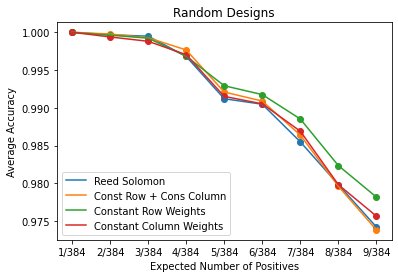

In [ ]:
# plot 
fig, ax = plt.subplots() 

ax.scatter(ks, average_RS)
ax.plot(ks, average_RS, label='Reed Solomon') 

ax.scatter(ks, average_random)
ax.plot(ks, average_random, label='Const Row + Cons Column') 

ax.scatter(ks, average_const_row)
ax.plot(ks, average_const_row, label='Constant Row Weights') 

ax.scatter(ks, average_const_col)
ax.plot(ks, average_const_col, label='Constant Column Weights') 

ax.legend() 
labels = ["%s/384"%k for k in ks] 
plt.xticks(ks, labels) 
plt.title("Random Designs")
plt.xlabel("Population Infection Rate")
plt.ylabel("Average Accuracy")

plt.savefig("./results/random-designs.png")
plt.show()